In [ ]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import soundfile as sf
import scipy

data = pd.read_csv('filtered_data_labeled_cleaned_working_samples.csv')

In [2]:
data = data.sample(n=10000)
durations = []
progress = 0
for path in data['path']:
    try:
        # get the duration of the file
        duration = sf.read(os.path.join('data', path))[0].shape[0] / sf.read(os.path.join('data', path))[1]
        durations.append(duration)
        progress += 1
        if progress % 100 == 0:
            print(f"Processed {progress} files")
    except Exception as e:
        print(f"Error reading {path}: {e}")
        data = data[data['path'] != path]
# plot the histogram of durations
plt.hist(durations, bins=100, color='blue', alpha=0.7)
plt.title('Durations Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# get the mean duration
mean_duration = np.mean(durations)
print(f"Mean duration: {mean_duration}")
# get the std duration
std_duration = np.std(durations)
print(f"Std duration: {std_duration}")

Processed 100 files
Processed 200 files
Processed 300 files


KeyboardInterrupt: 

We'll see about that

## Noise and Silence Removal

In [ ]:
# 2
# noise reduction
def BPF(audio, sr, lowcut=300.0, highcut=3000.0, order=5):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.lfilter(b, a, audio)
    return y

# trim silence based on low energy within frames of the signal
def trim_silence(audio, threshold=0.01, frame_length=2048, hop_length=512, sr=16000):
    # apply a bandpass filter to the audio signal 80-8000 Hz
    # audio = BPF(audio, sr, lowcut=80.0, highcut=3000.0)
    energy = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]
    frames = np.nonzero(energy > threshold)
    
    if len(frames[0]) == 0:
        return audio  # all silence, just return original
    
    indices = librosa.frames_to_samples(frames)[0]
    start = max(indices[0] - hop_length, 0)
    end = min(indices[-1] + hop_length, len(audio))
    return audio[start:end]

def normalize_amplitude(audio, target_db=-20):
    rms = np.sqrt(np.mean(audio**2))
    current_db = 20 * np.log10(rms)
    scaling_factor = 10 ** ((target_db - current_db) / 20)
    return audio * scaling_factor

def normalize_tempo(audio, sr, target_tempo=60):
    tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
    if tempo == 0:
        return audio  # avoid division by zero
    rate = float(target_tempo) / float(tempo)
    return librosa.effects.time_stretch(y=audio, rate=rate)

test_path = "data/common_voice_en_164.mp3"
audio, sr = librosa.load(test_path, sr=None)
audio = trim_silence(audio, threshold=0.005, frame_length=2048, hop_length=512, sr=sr)
audio = normalize_amplitude(audio, target_db=-20)
#audio = normalize_tempo(audio, sr, target_tempo=60)
sf.write('trimmed-m.wav', audio, sr)


In [ ]:
# 3 (try to parallelize the process)
output_dir = 'processed'
progress = 0
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for index, row in data.iterrows():
    try:
        # Load the audio file
        audio_path = os.path.join('data', row['path'].replace('.wav', '.mp3'))
        audio, sr = librosa.load(audio_path, sr=None)
        
        # Apply silence trimming
        audio = trim_silence(audio, threshold=0.005, frame_length=2048, hop_length=512, sr=sr)
        audio = normalize_amplitude(audio, target_db=-20)
        # audio = normalize_tempo(audio, sr, target_tempo=60)
        
        # Save the processed audio to the output directory
        output_path = os.path.join(output_dir, row['path'])
        sf.write(output_path, audio, sr)
        
        # Update and print progress
        progress += 1
        if progress % 100 == 0:
            print(f"Processed {progress} files")
    except Exception as e:
        print(f"Error processing {row['path']}: {e}")

Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
Processed 3900 files
Processed 4000 files
Processed 4100 files
Processed 4200 files
Processed 4300 files
Processed 4400 files
Processed 4500 files
Processed 4600 files
Processed 4700 files
Processed 4800 files
P

Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
Processed 3900 files
Processed 4000 files
Processed 4100 files
Processed 4200 files
Processed 4300 files
Processed 4400 files
Processed 4500 files
Processed 4600 files
Processed 4700 files
Processed 4800 files
P

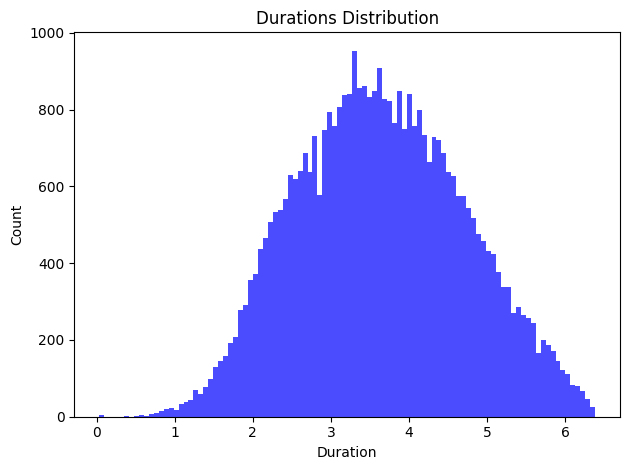

Mean duration: 3.6393445038621506
Std duration: 1.0748073286125237


In [19]:
durations = []
progress = 0
for path in data['path']:
    path = path.replace('.mp3', '.wav')
    try:
        # get the duration of the file
        duration = sf.read(os.path.join('processed', path))[0].shape[0] / sf.read(os.path.join('processed', path))[1]
        durations.append(duration)
        progress += 1
        if progress % 100 == 0:
            print(f"Processed {progress} files")
    except Exception as e:
        print(f"Error reading {path}: {e}")
        data = data[data['path'] != path]
# plot the histogram of durations
plt.hist(durations, bins=100, color='blue', alpha=0.7)
plt.title('Durations Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# get the mean duration
mean_duration = np.mean(durations)
print(f"Mean duration: {mean_duration}")
# get the std duration
std_duration = np.std(durations)
print(f"Std duration: {std_duration}")

In [ ]:
# count durations under 1 second
under_1s = len([d for d in durations if d < 1])
print(f"Number of files under 1 second: {under_1s}")
# get their paths
under_1s_paths = [path for path, d in zip(data['path'], durations) if d < 1]
# print(f"Paths of files under 1 second: {under_1s_paths}")
# remove them from the data after rechecking thier actual duration
for path in under_1s_paths:
    try:
        # get the duration of the file
        duration = sf.read(os.path.join('processed', path.replace('.mp3', '.wav')))[0].shape[0] / sf.read(os.path.join('processed', path.replace('.mp3', '.wav')))[1]
        if duration < 1:
            data = data[data['path'] != path]
    except Exception as e:
        print(f"Error reading {path}: {e}")
        data = data[data['path'] != path]
# save the data to a new csv file
data.to_csv('filtered_data_labeled_cleaned_working_samples.csv', index=False)


Number of files under 1 second: 92


In [ ]:
# 4
# trim-pad (normalize length) to 4 seconds
def trim_pad(audio, target_length=4, sr=48000):
    target_samples = int(target_length * sr)
    if len(audio) > target_samples:
        return audio[:target_samples]
    else:
        padding = np.zeros(target_samples - len(audio))
        return np.concatenate((audio, padding))

In [ ]:
# 5
test_path = "processed/common_voice_en_2509.wav"
audio, sr = librosa.load(test_path, sr=None)
audio = trim_pad(audio, target_length=3.5, sr=sr)
sf.write('trimmed-padded.wav', audio, sr)
# trim-pad all files to 4 seconds
output_dir = 'trimmed_padded'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
progress = 0
for index, row in data.iterrows():
    try:
        # Load the audio file
        audio_path = os.path.join('processed', row['path'].replace('.mp3', '.wav'))
        audio, sr = librosa.load(audio_path, sr=None)
        
        # Apply trim-pad
        audio = trim_pad(audio, target_length=4, sr=sr)
        
        # Save the processed audio to the output directory
        output_path = os.path.join(output_dir, row['path'].replace('.mp3', '.wav'))
        sf.write(output_path, audio, sr)
        
        # Update and print progress
        progress += 1
        if progress % 100 == 0:
            print(f"Processed {progress} files")
    except Exception as e:
        print(f"Error processing {row['path']}: {e}")

Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
Processed 3900 files
Processed 4000 files
Processed 4100 files
Processed 4200 files
Processed 4300 files
Processed 4400 files
Processed 4500 files
Processed 4600 files
Processed 4700 files
Processed 4800 files
P

In [ ]:
# # get list of files in processed_trial_1 and not in processed
# processed_trial_1 = os.listdir('processed_trial_1')
# processed = os.listdir('processed')
# not_in_processed = [f for f in processed_trial_1 if f not in processed]
# # process the files names in processed_trial_1 that are not in processed (get from data dir)

# progress = 0
# for file in not_in_processed:
#     try:
#         # Load the audio file
#         audio_path = os.path.join('data', file.replace('.wav', '.mp3'))
#         audio, sr = librosa.load(audio_path, sr=None)
        
#         # Apply silence trimming
#         audio = trim_silence(audio, threshold=0.005, frame_length=2048, hop_length=512, sr=sr)
#         audio = normalize_amplitude(audio, target_db=-20)
#         # audio = normalize_tempo(audio, sr, target_tempo=60)
        
#         # Save the processed audio to the output directory
#         output_path = os.path.join('processed', file.replace('.mp3', '.wav'))
#         sf.write(output_path, audio, sr)
        
#         # Update and print progress
#         progress += 1
#         if progress % 100 == 0:
#             print(f"Processed {progress} files")
#     except Exception as e:
#         print(f"Error processing {file}: {e}")


Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files
Processed 600 files
Processed 700 files
Processed 800 files
Processed 900 files
Processed 1000 files
Processed 1100 files
Processed 1200 files
Processed 1300 files
Processed 1400 files
Processed 1500 files
Processed 1600 files
Processed 1700 files
Processed 1800 files
Processed 1900 files
Processed 2000 files
Processed 2100 files
Processed 2200 files
Processed 2300 files
Processed 2400 files
Processed 2500 files
Processed 2600 files
Processed 2700 files
Processed 2800 files
Processed 2900 files
Processed 3000 files
Processed 3100 files
Processed 3200 files
Processed 3300 files
Processed 3400 files
Processed 3500 files
Processed 3600 files
Processed 3700 files
Processed 3800 files
